# Fashion MNIST dataset

In this project I've used fashion_mnist dataset from keras.datasets package and tried applying ANN using Keras.

In [1]:
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
# Imported Fashion MNIST dataset
data= keras.datasets.fashion_mnist.load_data()

In [3]:
dir(data)

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'count',
 'index']

In [4]:
(x_train, y_train), (x_test, y_test)= data  #Train test split

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
y_train.shape

(60000,)

In [7]:
x_test.shape

(10000, 28, 28)

In [8]:
y_test.shape

(10000,)

In [12]:
x_train[0] # 2D array.

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

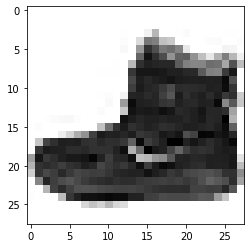

In [13]:
plt.imshow(x_train[0], cmap='gray_r')

In [14]:
y_train[0]

9

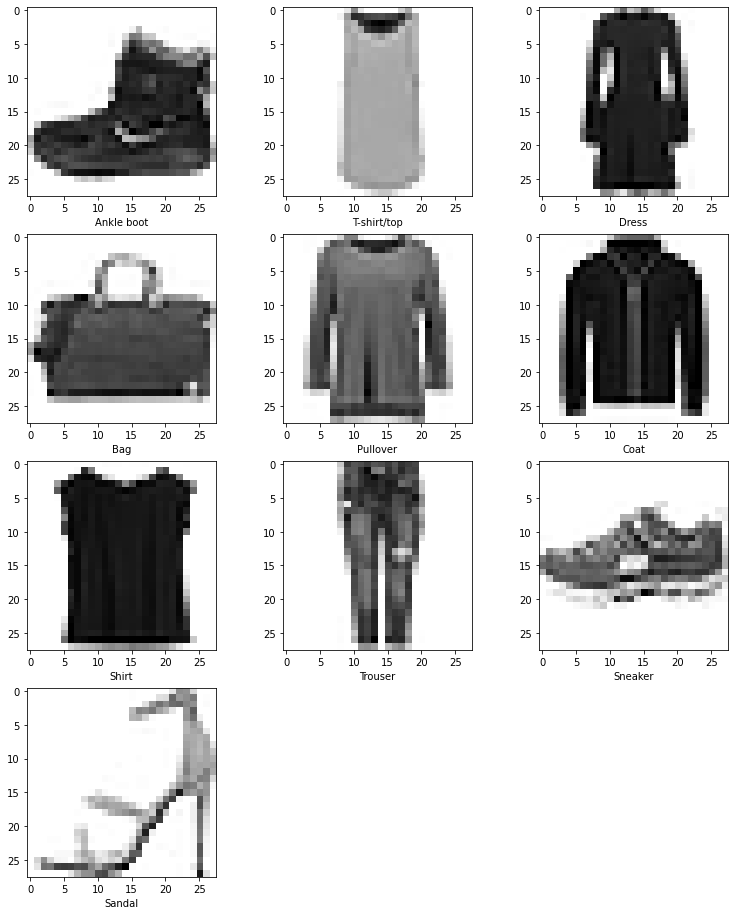

In [32]:
fig= plt.figure(figsize=(13,16))
row=[0,2,49,99,199,399,499,599,699,899]
ticks= ['Ankle boot','T-shirt/top','Dress','Bag','Pullover','Coat','Shirt','Trouser','Sneaker','Sandal']
for sp in range(10):    
    ax= fig.add_subplot(4,3,sp+1)
    image= x_train[row[sp]]
    ax.imshow(image, cmap='gray_r')
    ax.set_xlabel(ticks[sp])
plt.show()

In [33]:
# Normalized the data between 0 to 1 by dividing with 255 ( color scale)
x_train= x_train/255
x_test= x_test/255

In [34]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [35]:
from keras.layers import Dense, Activation, Flatten
from keras.models import Sequential

In [36]:
model= Sequential(
    [
        Flatten(input_shape=[28,28]),   # Input layer of size 28/28 2d converted into 1d for nn.
        Dense(20, activation= 'relu'),  # 20 neurons in 1st hidden layer.
        Dense(10, activation= 'softmax'), # 10 distinct prob values as 10 diff outputs are there.
    ]
)

In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                15700     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
Total params: 15,910
Trainable params: 15,910
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.compile(loss= 'sparse_categorical_crossentropy',
             optimizer= 'adam',
             metrics= ['accuracy'])

In [39]:
model.fit(x_train, y_train, epochs= 10)

Epoch 1/10
60000/60000 [==============================] - 14s 225us/step - loss: 0.6049 - accuracy: 0.7923
Epoch 2/10
60000/60000 [==============================] - 13s 224us/step - loss: 0.4419 - accuracy: 0.8469
Epoch 3/10
60000/60000 [==============================] - 13s 209us/step - loss: 0.4089 - accuracy: 0.8559
Epoch 4/10
60000/60000 [==============================] - 14s 228us/step - loss: 0.3908 - accuracy: 0.8622
Epoch 5/10
60000/60000 [==============================] - 20s 335us/step - loss: 0.3757 - accuracy: 0.8661
Epoch 6/10
60000/60000 [==============================] - 18s 302us/step - loss: 0.3635 - accuracy: 0.8703
Epoch 7/10
60000/60000 [==============================] - 20s 328us/step - loss: 0.3546 - accuracy: 0.8748
Epoch 8/10
60000/60000 [==============================] - 11s 189us/step - loss: 0.3475 - accuracy: 0.8762
Epoch 9/10
60000/60000 [==============================] - 10s 170us/step - loss: 0.3408 - accuracy: 0.8781
Epoch 10/10
60000/60000 [============

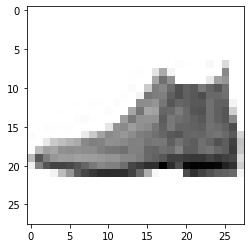

In [40]:
plt.imshow(x_test[0], cmap='gray_r')

In [42]:
yp= model.predict(x_test)

In [43]:
yp[0]

array([6.51627715e-07, 1.06841196e-10, 2.66950883e-06, 3.25358975e-08,
       4.05334575e-08, 1.25234900e-02, 2.76546434e-05, 6.62053004e-03,
       1.61418610e-03, 9.79210794e-01], dtype=float32)

In [44]:
np.argmax(yp[0])

9

In [45]:
# To measure overall accuracy.
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 80us/step


[0.39304809505939486, 0.8611000180244446]